# Mushroom Classification
### By @geek1it

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
train = pd.read_csv("Desktop/mushrooms.csv")

In [150]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [151]:
train.shape

(8124, 23)

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [153]:
train.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

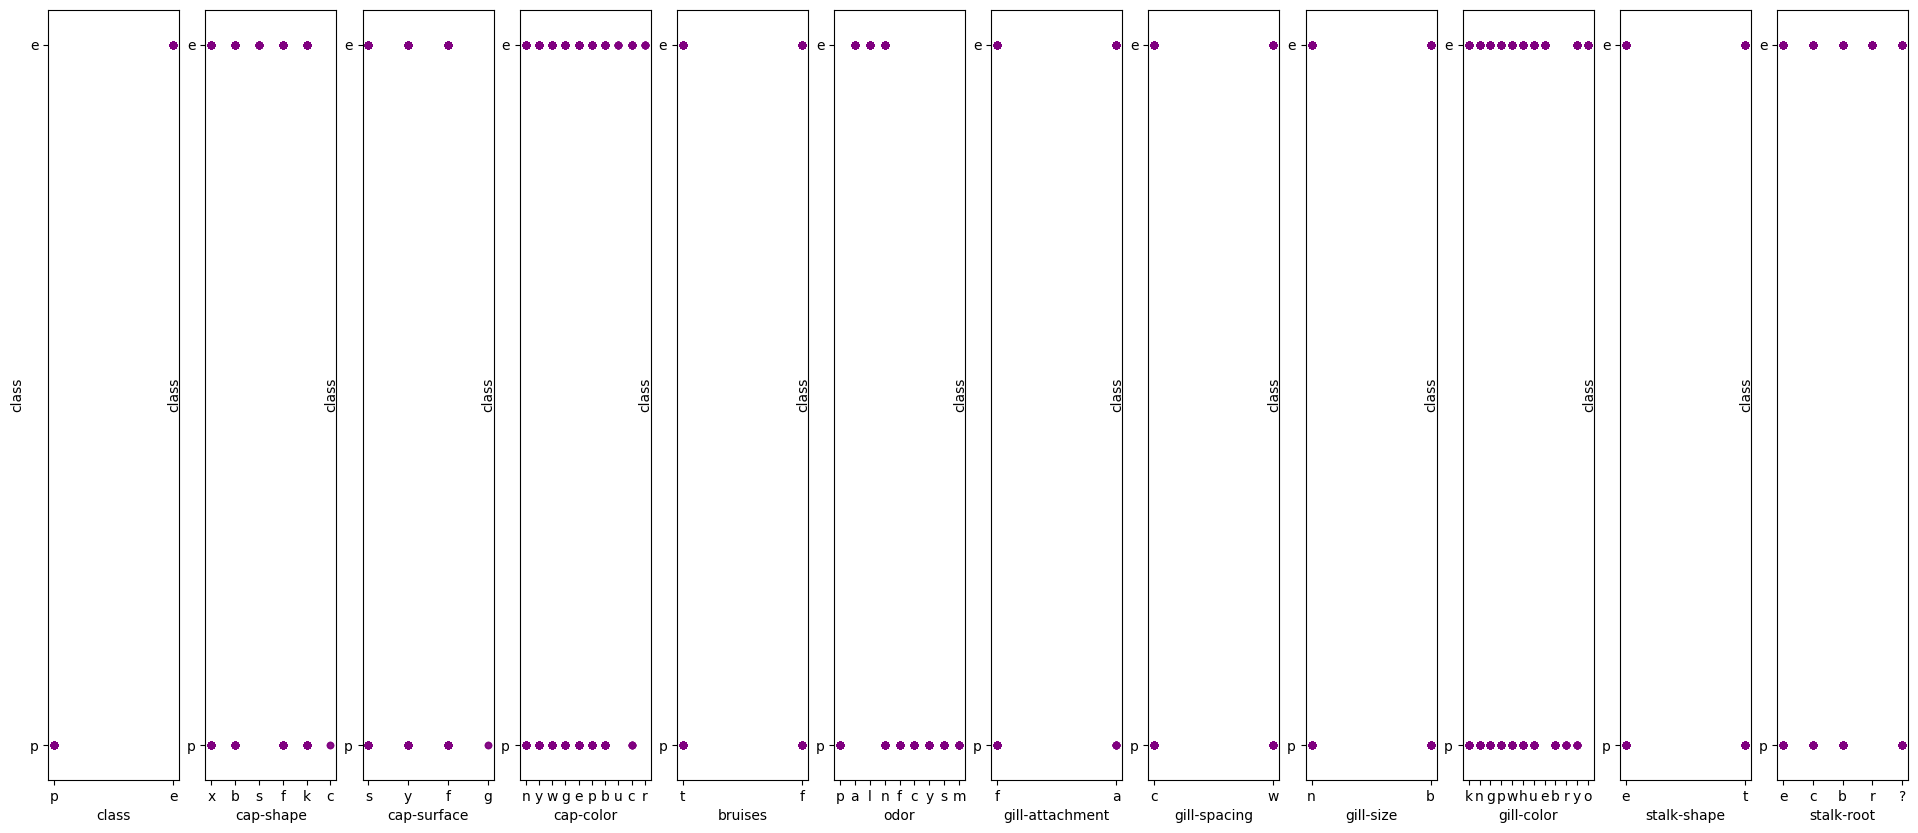

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(24,10))
for xcol, ax in zip(train, axes):
    train.plot(kind='scatter', x=xcol, y='class', ax=ax, alpha=0.5, color='purple')

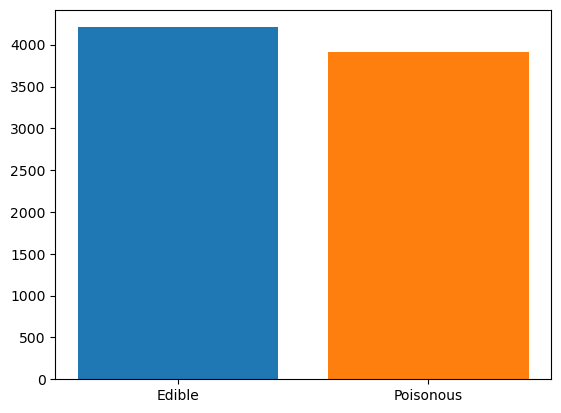

In [193]:
classes = train['class'].value_counts()

plt.bar('Edible', classes['e'])

plt.bar('Poisonous', classes['p'])

plt.show()



In [194]:
X = train.drop(columns = "class")
Y = train["class"]

In [195]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [196]:
from sklearn import preprocessing

In [197]:
le = LabelEncoder()

In [198]:
for i in  X.columns:
    X[i] = le.fit_transform(X[i])
Y = le.fit_transform(Y)

In [199]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [201]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [202]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size = 0.2)

In [203]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7614,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
3016,5,0,3,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,4,1
5485,2,3,3,0,2,1,0,0,7,0,...,1,6,4,0,2,1,2,1,4,4
2080,5,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
4173,2,0,9,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,4,1
5704,3,3,2,1,5,1,0,0,10,0,...,2,2,7,0,2,2,0,7,1,6
6637,2,2,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
2575,5,3,4,1,5,1,0,0,5,1,...,2,7,7,0,2,1,4,2,5,0


In [204]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
606,5,2,3,0,5,1,1,0,5,1,...,0,7,7,0,2,1,0,3,3,1
3783,2,0,3,0,2,1,0,0,2,0,...,1,6,0,0,2,1,2,1,4,0
7701,2,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,4,2
4202,5,0,9,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,4,1
6956,3,2,2,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,5,0,9,0,2,1,0,0,2,0,...,1,6,6,0,2,1,2,1,4,1
712,5,2,8,1,3,1,0,0,10,0,...,2,7,7,0,2,1,4,3,3,3
2400,5,2,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,4,1
4980,2,3,3,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,4,1


In [205]:
Y_train

array([1, 1, 1, ..., 1, 0, 1])

In [206]:
Y_test

array([0, 1, 0, ..., 1, 1, 0])

In [207]:
from sklearn.neighbors import KNeighborsClassifier
classification =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classification.fit(X_train , Y_train)

KNeighborsClassifier()

In [215]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
logistic_model = LogisticRegression()

ridge_model = RidgeClassifier()

decision_model = DecisionTreeClassifier()

In [216]:
logistic_model.fit(X_train , Y_train)

E:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [217]:
ridge_model.fit(X_train , Y_train)

RidgeClassifier()

In [218]:
decision_model.fit(X_train , Y_train)

DecisionTreeClassifier()

In [221]:
pred1 = decision_model.predict(X_test)

In [222]:
pred2 = ridge_model.predict(X_test)

In [224]:
pred3 = logistic_model.predict(X_test)

In [226]:
from sklearn.metrics import classification_report
logistic_report = classification_report(Y_test, pred3)

ridge_report = classification_report(Y_test, pred2)

tree_report = classification_report(Y_test, pred1)

In [227]:
print(logistic_report )

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       860
           1       0.95      0.94      0.95       765

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [228]:
print(ridge_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       860
           1       0.95      0.92      0.94       765

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [229]:
print(tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



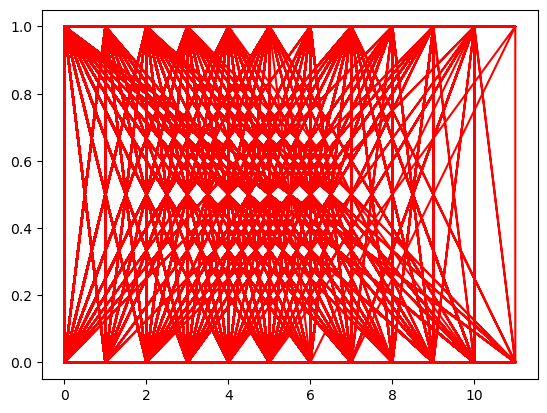

In [232]:
plt.plot(X_test , pred1 , c = "red")

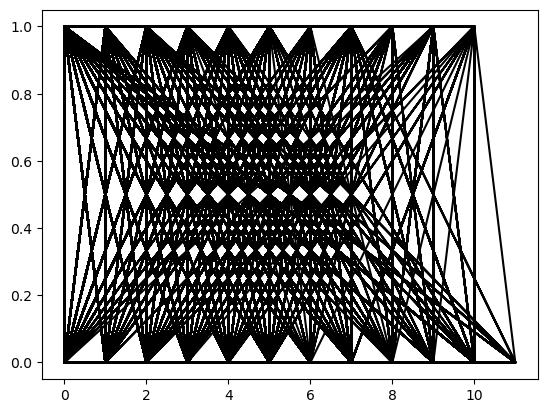

In [236]:
plt.plot(X_test , pred2 , c = "black")

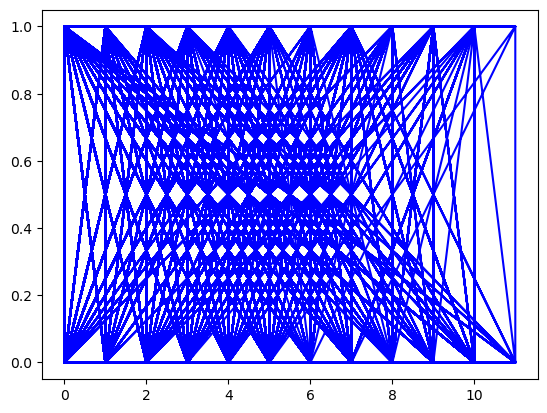

In [237]:
plt.plot(X_test , pred3 , c = "blue")